## Unsupervised learning

#### 4 Marks ⟩ Do basic data pre-processing on the data and perform PCA (scratch implementation) and tell. What percentage of variance is covered by first principal component, first and second principal component.

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [138]:
file_path = "archive/Airplane.csv"
data = pd.read_csv(file_path)
print(data)
print(len(data))

            Date   Time                                           Location   
0     09/17/1908  17:18                                Fort Myer, Virginia  \
1     07/12/1912  06:30                            AtlantiCity, New Jersey   
2     08/06/1913    NaN                 Victoria, British Columbia, Canada   
3     09/09/1913  18:30                                 Over the North Sea   
4     10/17/1913  10:30                         Near Johannisthal, Germany   
...          ...    ...                                                ...   
5263  05/20/2009  06:30                             Near Madiun, Indonesia   
5264  05/26/2009    NaN                  Near Isiro, DemocratiRepubliCongo   
5265  06/01/2009  00:15  AtlantiOcean, 570 miles northeast of Natal, Br...   
5266  06/07/2009  08:30       Near Port Hope Simpson, Newfoundland, Canada   
5267  06/08/2009    NaN                  State of Arunachal Pradesh, India   

                             Operator Flight #   
0            

In [139]:
import pandas as pd
import numpy as np

numeric_data = data[['Aboard', 'Fatalities', 'Ground']]

import pandas as pd
column_data_types = data.dtypes

# Print the data types
print(column_data_types)


Date             object
Time             object
Location         object
Operator         object
Flight #         object
Route            object
Type             object
Registration     object
cn/In            object
Aboard          float64
Fatalities      float64
Ground          float64
Summary          object
dtype: object


In [140]:
# Get all the column names
columns = data.columns
print(columns)


Index(['Date', 'Time', 'Location', 'Operator', 'Flight #', 'Route', 'Type',
       'Registration', 'cn/In', 'Aboard', 'Fatalities', 'Ground', 'Summary'],
      dtype='object')


In [141]:
missing_values_X = data[columns].isnull().sum()
print("Missing values in each column:")
print(missing_values_X)


Missing values in each column:
Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1707
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64


#### Since there are so many values of time which are missing in the rows, replacing it with the median values would be a fair distribution

### Dropping the rows that have missing values of location because, 1 cant be replace and they are too less

In [142]:
missing_values_ground = data['Ground'].isnull().sum()
print("Missing ground values " ,missing_values_ground)

data['Ground'].fillna(data['Ground'].mean(), inplace=True)

missing_values_ground = data['Ground'].isnull().sum()
print("Missing ground values " , missing_values_ground)

Missing ground values  22
Missing ground values  0


In [143]:
missing_values_fatalities = data['Fatalities'].isnull().sum()
print("Missing fatalities values " ,missing_values_fatalities)

data['Fatalities'].fillna(data['Fatalities'].mean(), inplace=True)

missing_values_fatalities = data['Fatalities'].isnull().sum()
print("Missing Fatalities values " , missing_values_fatalities)

Missing fatalities values  12
Missing Fatalities values  0


In [144]:
missing_values_Aboard = data['Aboard'].isnull().sum()
print("Missing Aboard values " ,missing_values_Aboard)

data['Aboard'].fillna(data['Aboard'].mean(), inplace=True)

missing_values_Aboard = data['Aboard'].isnull().sum()
print("Missing Aboard values " , missing_values_Aboard)

Missing Aboard values  22
Missing Aboard values  0


In [145]:
print(len(data))

5268


In [146]:
print(len(data['Date'].unique()))
print(len(data['Time'].unique()))

# print(len(data['cn/In'].unique()))
# print(len(data['Route'].unique()))
print(len(data['Registration'].unique()))
# print(len(data['Type'].unique()))
# print(len(data['Route'].unique()))

# print(len(data['Operator'].unique()))
# print(len(data['Location'].unique()))

4753
1006
4906


In [147]:
# Extract the "Location" column
Location_numbers = data["Location"]

# Create a dictionary to map unique Location numbers to numerical labels
ordinal_mapping = {Location: label+1 for label, Location in enumerate(Location_numbers.unique())}

# Apply the mapping to create a new numerical column
data["Location_encoded"] = data["Location"].map(ordinal_mapping)

# Print the number of unique Location numbers
num_unique_Location_numbers = len(ordinal_mapping)
print("Number of Unique Location Numbers:", num_unique_Location_numbers)

# Display the first few rows of the updated DataFrame
print(data[["Location_encoded"]])


Number of Unique Location Numbers: 4304
      Location_encoded
0                    1
1                    2
2                    3
3                    4
4                    5
...                ...
5263              4300
5264              4301
5265              4302
5266              4303
5267              4304

[5268 rows x 1 columns]


In [148]:
# Extract the "Operator" column
Operator_numbers = data["Operator"]

# Create a dictionary to map unique Operator numbers to numerical labels
ordinal_mapping = {Operator: label+1 for label, Operator in enumerate(Operator_numbers.unique())}

# Apply the mapping to create a new numerical column
data["Operator_encoded"] = data["Operator"].map(ordinal_mapping)

# Print the number of unique Operator numbers
num_unique_Operator_numbers = len(ordinal_mapping)
print("Number of Unique Operator Numbers:", num_unique_Operator_numbers)

# Display the first few rows of the updated DataFrame
print(data[["Operator_encoded"]])


Number of Unique Operator Numbers: 2477
      Operator_encoded
0                    1
1                    2
2                    3
3                    4
4                    4
...                ...
5263              1419
5264              2336
5265               113
5266              2477
5267               202

[5268 rows x 1 columns]


In [149]:
# Extract the "Route" column
Route_numbers = data["Route"]

# Create a dictionary to map unique Route numbers to numerical labels
ordinal_mapping = {Route: label+1 for label, Route in enumerate(Route_numbers.unique())}

# Apply the mapping to create a new numerical column
data["Route_encoded"] = data["Route"].map(ordinal_mapping)

# Print the number of unique Route numbers
num_unique_Route_numbers = len(ordinal_mapping)
print("Number of Unique Route Numbers:", num_unique_Route_numbers)

# Display the first few rows of the updated DataFrame
print(data[["Route_encoded"]])


Number of Unique Route Numbers: 3244
      Route_encoded
0                 1
1                 2
2                 3
3                 3
4                 3
...             ...
5263           3240
5264           3241
5265           3242
5266           3243
5267           3244

[5268 rows x 1 columns]


In [150]:
# Extract the "cn/In" column
cnIn_numbers = data["cn/In"]

# Create a dictionary to map unique cn/In numbers to numerical labels
ordinal_mapping = {cnIn: label+1 for label, cnIn in enumerate(cnIn_numbers.unique())}

# Apply the mapping to create a new numerical column
data["cn/In"] = data["cn/In"].map(ordinal_mapping)

# Print the number of unique cn/In numbers
num_unique_cnIn_numbers = len(ordinal_mapping)
print("Number of Unique cn/In Numbers:", num_unique_cnIn_numbers)

# Display the first few rows of the updated DataFrame
print(data[["cn/In"]])


Number of Unique cn/In Numbers: 3708
      cn/In
0         1
1         2
2         2
3         2
4         2
...     ...
5263    236
5264   3707
5265     20
5266   3708
5267      2

[5268 rows x 1 columns]


In [151]:
# Extract the "Type" column
Type_numbers = data["Type"]

# Create a dictionary to map unique Type numbers to numerical labels
ordinal_mapping = {Type: label+1 for label, Type in enumerate(Type_numbers.unique())}

# Apply the mapping to create a new numerical column
data["Type_encoded"] = data["Type"].map(ordinal_mapping)

# Print the number of unique Type numbers
num_unique_Type_numbers = len(ordinal_mapping)
print("Number of Unique Type Numbers:", num_unique_Type_numbers)

# Display the first few rows of the updated DataFrame
print(data[["Type_encoded"]])


Number of Unique Type Numbers: 2447
      Type_encoded
0                1
1                2
2                3
3                4
4                5
...            ...
5263          1337
5264          1704
5265          2447
5266          1516
5267          1637

[5268 rows x 1 columns]


In [152]:
# Extract the "Registration" column
Registration_numbers = data["Registration"]

# Create a dictionary to map unique Registration numbers to numerical labels
ordinal_mapping = {Registration: label+1 for label, Registration in enumerate(Registration_numbers.unique())}

# Apply the mapping to create a new numerical column
data["Registration"] = data["Registration"].map(ordinal_mapping)

# Print the number of unique Registration numbers
num_unique_Registration_numbers = len(ordinal_mapping)
print("Number of Unique Registration Numbers:", num_unique_Registration_numbers)

# Display the first few rows of the updated DataFrame
print(data[["Registration"]])


Number of Unique Registration Numbers: 4906
      Registration
0                1
1                1
2                1
3                1
4                1
...            ...
5263          4903
5264          4904
5265          4905
5266          4906
5267             1

[5268 rows x 1 columns]


In [153]:
# Extract the "Flight #" column
flight_numbers = data["Flight #"]

# Create a dictionary to map unique flight numbers to numerical labels
ordinal_mapping = {flight: label+1 for label, flight in enumerate(flight_numbers.unique())}

# Apply the mapping to create a new numerical column
data["Flight #"] = data["Flight #"].map(ordinal_mapping)

# Print the number of unique flight numbers
num_unique_flight_numbers = len(ordinal_mapping)
print("Number of Unique Flight Numbers:", num_unique_flight_numbers)

# Display the first few rows of the updated DataFrame
print(data[["Flight #"]].head())


Number of Unique Flight Numbers: 725
   Flight #
0         1
1         1
2         2
3         1
4         1


In [154]:
# Extract the "Time" column
Time_numbers = data["Time"]

# Create a dictionary to map unique Time numbers to numerical labels
ordinal_mapping = {Time: label+1 for label, Time in enumerate(Time_numbers.unique())}

# Apply the mapping to create a new numerical column
data["Time"] = data["Time"].map(ordinal_mapping)

# Print the number of unique Time numbers
num_unique_Time_numbers = len(ordinal_mapping)
print("Number of Unique Time Numbers:", num_unique_Time_numbers)

# Display the first few rows of the updated DataFrame
print(data[["Time"]])


Number of Unique Time Numbers: 1006
      Time
0        1
1        2
2        3
3        4
4        5
...    ...
5263     2
5264     3
5265   398
5266    19
5267     3

[5268 rows x 1 columns]


In [155]:
# Extract the "Date" column
Date_numbers = data["Date"]

# Create a dictionary to map unique Date numbers to numerical labels
ordinal_mapping = {Date: label+1 for label, Date in enumerate(Date_numbers.unique())}

# Apply the mapping to create a new numerical column
data["Date"] = data["Date"].map(ordinal_mapping)

# Print the number of unique Date numbers
num_unique_Date_numbers = len(ordinal_mapping)
print("Number of Unique Date Numbers:", num_unique_Date_numbers)

# Display the first few rows of the updated DataFrame
print(data[["Date"]])


Number of Unique Date Numbers: 4753
      Date
0        1
1        2
2        3
3        4
4        5
...    ...
5263  4749
5264  4750
5265  4751
5266  4752
5267  4753

[5268 rows x 1 columns]


In [156]:
print(data[["Flight #"]])

      Flight #
0            1
1            1
2            2
3            1
4            1
...        ...
5263         1
5264         1
5265       725
5266         1
5267         1

[5268 rows x 1 columns]


In [157]:
missing_values_X = data[columns].isnull().sum()

# Check for missing values in 'y'

print("Missing values in each column:")
print(missing_values_X)

Missing values in each column:
Date               0
Time               0
Location          20
Operator          18
Flight #           0
Route           1707
Type              27
Registration       0
cn/In              0
Aboard             0
Fatalities         0
Ground             0
Summary          390
dtype: int64


In [158]:
numeric_data = data[['Aboard', 'Fatalities', 'Ground','Flight #', 'Date','Location_encoded','Operator_encoded','Route_encoded','Type_encoded', 'Registration','cn/In','Time' ]]

##### Step 2: Standardize the data



In [159]:
mean = np.mean(numeric_data, axis=0)
std_dev = np.std(numeric_data, axis=0)
standardized_data = (numeric_data - mean) / std_dev
print(standardized_data)

        Aboard  Fatalities    Ground  Flight #      Date  Location_encoded   
0    -0.594532   -0.575057 -0.029865 -0.390563 -1.756982         -1.581025  \
1    -0.524736   -0.454426 -0.029865 -0.390563 -1.756246         -1.580224   
2    -0.617797   -0.575057 -0.029865 -0.384081 -1.755510         -1.579423   
3    -0.175758   -0.183006 -0.029865 -0.390563 -1.754773         -1.578621   
4     0.056895    0.299518 -0.029865 -0.390563 -1.754037         -1.577820   
...        ...         ...       ...       ...       ...               ...   
5263  1.964645    2.350245  0.007261 -0.390563  1.738171          1.864356   
5264 -0.548002   -0.484584  0.000000 -0.390563  1.738907          1.865158   
5265  4.663413    6.270754 -0.029865  4.302354  1.739643          1.865959   
5266 -0.617797   -0.575057 -0.029865 -0.390563  1.740379          1.866761   
5267 -0.338614   -0.213164 -0.029865 -0.390563  1.741115          1.867562   

      Operator_encoded  Route_encoded  Type_encoded  Registrati

##### Step 3: Calculate the covariance matrix



In [160]:
cov_matrix = np.cov(standardized_data, rowvar=False)
print(cov_matrix)

[[ 1.00018986  0.75685718  0.02324085  0.42359718  0.14650381  0.090329
  -0.05148559  0.189652    0.17280809  0.13179747  0.17190667  0.15397561]
 [ 0.75685718  1.00018986  0.03517168  0.33070476  0.09793394  0.098129
  -0.03691186  0.13787922  0.11700369  0.0823577   0.12215965  0.13175055]
 [ 0.02324085  0.03517168  1.00018986  0.04954687  0.03094438 -0.01954775
  -0.01736147  0.03525084  0.03950197  0.02996379  0.03097513  0.04111243]
 [ 0.42359718  0.33070476  0.04954687  1.00018986  0.29125853  0.19802536
   0.19010719  0.3546739   0.30732424  0.30442509  0.32232159  0.30972153]
 [ 0.14650381  0.09793394  0.03094438  0.29125853  1.00018986  0.86258255
   0.81481007  0.71627885  0.88566171  0.9166442   0.78257726  0.3840792 ]
 [ 0.090329    0.098129   -0.01954775  0.19802536  0.86258255  1.00018986
   0.70121586  0.60525642  0.75789216  0.78330485  0.65915051  0.29896816]
 [-0.05148559 -0.03691186 -0.01736147  0.19010719  0.81481007  0.70121586
   1.00018986  0.6321623   0.7139352

##### Step 4: Compute the eigenvalues and eigenvectors of the covariance matrix


In [161]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print(eigenvalues)
print(eigenvectors)

[5.85866642 1.9727859  1.00800475 0.85642771 0.63167369 0.04972653
 0.11722508 0.19693602 0.25354094 0.29086903 0.39452876 0.37189351]
[[ 0.09773579  0.62566506  0.1022696   0.18815947  0.11122858 -0.05627075
  -0.03834759  0.5329572   0.42914884 -0.24812952  0.05103427  0.06110888]
 [ 0.07881498  0.60849361  0.10405263  0.26253303  0.28224803  0.02778394
   0.05804268 -0.43918162 -0.32275307  0.39022417 -0.007282   -0.10290948]
 [ 0.0144544   0.05961824 -0.96672286  0.23779864  0.024477   -0.01464173
  -0.01060477  0.04892471 -0.01602068  0.02057814 -0.01651747 -0.0293754 ]
 [ 0.17335543  0.38359569 -0.07832074 -0.38228403 -0.77025439  0.0081187
   0.01523951 -0.01445777 -0.12239085  0.05050109 -0.22060464 -0.10262421]
 [ 0.39564145 -0.08988906  0.01817922  0.1250374   0.02383143  0.86545885
   0.19395288  0.01662398  0.06307767 -0.07760404 -0.14378621 -0.0355847 ]
 [ 0.35073284 -0.1121621   0.09040038  0.20397813  0.10102943 -0.21071154
  -0.18576099  0.35933103 -0.62624406 -0.253184

##### Step 5: Sort the eigenvalues in descending order


In [162]:

eigenvalue_pairs = [(eigenvalues[i], eigenvectors[:, i]) for i in range(len(eigenvalues))]
eigenvalue_pairs.sort(reverse=True, key=lambda x: x[0])
print(eigenvalue_pairs)

[(5.8586664169929215, array([0.09773579, 0.07881498, 0.0144544 , 0.17335543, 0.39564145,
       0.35073284, 0.33944197, 0.33368144, 0.36783507, 0.38585868,
       0.34842921, 0.20560295])), (1.9727858968741014, array([ 0.62566506,  0.60849361,  0.05961824,  0.38359569, -0.08988906,
       -0.1121621 , -0.20902754,  0.01775119, -0.04772919, -0.08467781,
       -0.02724918,  0.11278227])), (1.00800474723223, array([ 0.1022696 ,  0.10405263, -0.96672286, -0.07832074,  0.01817922,
        0.09040038,  0.04062584, -0.03731327, -0.00175182,  0.00352319,
        0.00525737, -0.16259821])), (0.856427713082441, array([ 0.18815947,  0.26253303,  0.23779864, -0.38228403,  0.1250374 ,
        0.20397813,  0.0410179 , -0.14021467,  0.08074389,  0.07653148,
        0.09927404, -0.76952396])), (0.631673687841578, array([ 0.11122858,  0.28224803,  0.024477  , -0.77025439,  0.02383143,
        0.10102943, -0.01179462, -0.01604067,  0.03976747, -0.02668   ,
       -0.1399829 ,  0.53010708])), (0.3945287

In [163]:
eigenvalue_pairs.sort(reverse=True, key=lambda x: x[0])

# Choose the top 'k' eigenvectors for dimensionality reduction
k = 2  # Replace with the desired number of dimensions
selected_eigenpairs = eigenvalue_pairs[:k]

# Extract the selected eigenvectors
selected_eigenvectors = np.array([eigenpair[1] for eigenpair in selected_eigenpairs]).T

# Perform dimensionality reduction by projecting the data onto the selected eigenvectors
X_reduced = np.dot(standardized_data, selected_eigenvectors)


##### Step 6: Calculate the total variance and variance covered by each principal component


In [164]:
total_variance = sum(eigenvalues)
explained_variance_ratio = [eigenvalue / total_variance for eigenvalue, _ in eigenvalue_pairs]


In [165]:
# Calculate the total sum of eigenvalues
total_eigenvalue_sum = sum(eigenvalues)

# Calculate the percentage of variance covered by each principal component
percentage_variance_explained = [(eigval / total_eigenvalue_sum) * 100 for eigval in eigenvalues]

# Print the percentage of variance explained by each principal component
for i, variance_explained in enumerate(percentage_variance_explained, start=1):
    print(f"Principal Component {i}: {variance_explained:.2f}% variance explained")

# Print the cumulative percentage of variance explained
cumulative_variance_explained = np.cumsum(percentage_variance_explained)
print(f"Cumulative Variance Explained by First Principal Components:")
for i, cumulative_variance in enumerate(cumulative_variance_explained, start=1):
    print(f"First {i} Principal Components: {cumulative_variance:.2f}% cumulative variance explained")


Principal Component 1: 48.81% variance explained
Principal Component 2: 16.44% variance explained
Principal Component 3: 8.40% variance explained
Principal Component 4: 7.14% variance explained
Principal Component 5: 5.26% variance explained
Principal Component 6: 0.41% variance explained
Principal Component 7: 0.98% variance explained
Principal Component 8: 1.64% variance explained
Principal Component 9: 2.11% variance explained
Principal Component 10: 2.42% variance explained
Principal Component 11: 3.29% variance explained
Principal Component 12: 3.10% variance explained
Cumulative Variance Explained by First Principal Components:
First 1 Principal Components: 48.81% cumulative variance explained
First 2 Principal Components: 65.25% cumulative variance explained
First 3 Principal Components: 73.65% cumulative variance explained
First 4 Principal Components: 80.78% cumulative variance explained
First 5 Principal Components: 86.05% cumulative variance explained
First 6 Principal Compo

In [166]:
# Step 6: Calculate the total variance and variance covered by each principal component
total_variance = sum(eigenvalues)
variance_explained = [(eigenvalue / total_variance) * 100 for eigenvalue, _ in eigenvalue_pairs]
print(total_variance)
print(variance_explained)


12.002278336814118
[48.812952446060706, 16.436761767330896, 8.398445019729433, 7.135542844857662, 5.262948167966327, 3.287115583850745, 3.0985242612499855, 2.423448500031735, 2.1124401044137033, 1.640821985725992, 0.9766901936268316, 0.41430912515599444]


In [167]:
# Step 7: Calculate the percentage of variance covered by the first and second principal components
percentage_variance_first_pc = variance_explained[0]
percentage_variance_second_pc = variance_explained[1]
print(percentage_variance_first_pc)
print(percentage_variance_second_pc)

48.812952446060706
16.436761767330896


In [168]:
print("Percentage of Variance Explained by First Principal Component:", percentage_variance_first_pc)
print("Percentage of Variance Explained by Second Principal Component:", percentage_variance_second_pc )
print("Percentage of Variance Explained by Third Principal Component:",variance_explained[2] )
print("Percentage of Variance Explained by First and Second Principal Component:", percentage_variance_second_pc + percentage_variance_first_pc)
print("Percentage of Variance Explained by First and third Principal Component:", percentage_variance_first_pc +variance_explained[2]  )
print("Percentage of Variance Explained by Second and third Principal Component:", percentage_variance_second_pc +variance_explained[2]  )

Percentage of Variance Explained by First Principal Component: 48.812952446060706
Percentage of Variance Explained by Second Principal Component: 16.436761767330896
Percentage of Variance Explained by Third Principal Component: 8.398445019729433
Percentage of Variance Explained by First and Second Principal Component: 65.2497142133916
Percentage of Variance Explained by First and third Principal Component: 57.21139746579014
Percentage of Variance Explained by Second and third Principal Component: 24.83520678706033


---------------------------------------------------------------------------------------------------------------------------------------------

In [169]:
import numpy as np

In [170]:
total_variance = sum(eigenvalues)
explained_variance_ratio = [eigenvalue / total_variance for eigenvalue, _ in eigenvalue_pairs]
cumulative_explained_variance = np.cumsum(explained_variance_ratio)


In [171]:
# Step 6: Project the data onto the selected principal components
projected_data = np.dot(standardized_data, eigenvectors.T)
print(len(projected_data))


5268


In [172]:
# Find the index of the "Type" column in the original column names_
column_names = ['Aboard', 'Fatalities', 'Ground', 'Flight #', 'Date', 'Location', 'Operator', 'Route_encoded', 'Type_encoded', 'Registration', 'cn/In', 'Time']

type_column_index = column_names.index('Type_encoded')
print(type_column_index)
# Use this index to access the corresponding column in projected_data
corresponding_column_in_pca = projected_data[:, type_column_index]

# Print the corresponding column
print(corresponding_column_in_pca)


8
[ 1.20849677  1.22719764  1.19829325 ...  1.22076768 -3.17132636
 -0.0108522 ]


In [173]:
print(projected_data[:, 8])

[ 1.20849677  1.22719764  1.19829325 ...  1.22076768 -3.17132636
 -0.0108522 ]


In [174]:
print(data['Type'])

0                       Wright Flyer III
1                              Dirigible
2                       Curtiss seaplane
3                 Zeppelin L-1 (airship)
4                 Zeppelin L-2 (airship)
                      ...               
5263             Lockheed C-130 Hercules
5264                       Antonov An-26
5265                     Airbus A330-203
5266    Britten-Norman BN-2A-27 Islander
5267                       Antonov An-32
Name: Type, Length: 5268, dtype: object


------------------------------------------------------------------------------------------------------------------

In [175]:
import numpy as np

def calculate_silhouette_score(data, cluster_assignments, centroids):
    n = len(data)
    silhouette_scores = np.zeros(n)
    
    for i in range(n):
        # Calculate a (average distance to other data points in the same cluster)
        cluster_i = cluster_assignments[i]
        cluster_data = data[cluster_assignments == cluster_i]
        a = np.mean(np.abs(data[i] - cluster_data))
        
        # Calculate b (smallest average distance to data points in other clusters)
        b = np.inf
        for k in range(len(centroids)):
            if k != cluster_i:
                other_cluster_data = data[cluster_assignments == k]
                distance_to_other_cluster = np.mean(np.abs(data[i] - other_cluster_data))
                b = min(b, distance_to_other_cluster)
        
        # Calculate silhouette score
        silhouette_scores[i] = (b - a) / max(a, b)
    
    # Compute the mean silhouette score
    mean_silhouette_score = np.mean(silhouette_scores)
    
    return mean_silhouette_score

# Calculate the silhouette score for your K-means clustering


In [176]:
import numpy as np

def ols(X, y):

  # Calculate the pseudoinverse of the design matrix.
  X_inv = np.linalg.pinv(X)

  # Calculate the OLS coefficients.
  beta = np.dot(X_inv, y)

  return beta

# Apply OLS to the PCA data and target variable.


In [177]:
def get_word_counts():
    word_counts = {}
    for type_name in data['Type']:
        if isinstance(type_name, str):
            words = type_name.split(' ')
            word = words[0]
            if word in word_counts:
                word_counts[word] += 1
            else:
                word_counts[word] = 1
    return word_counts


# Get the word counts
word_counts = get_word_counts()

# Print the word counts
print(word_counts)


{'Wright': 1, 'Dirigible': 3, 'Curtiss': 122, 'Zeppelin': 16, 'Schutte-Lanz': 2, 'Super': 1, 'Airship': 1, 'De': 43, 'Armstrong-Whitworth': 1, 'Junkers': 84, 'Salmson': 1, 'Breguet': 25, 'Handley': 22, 'Royal': 2, 'Potez': 4, 'Bristol': 26, 'de': 258, 'Vickers': 95, 'Bleriot': 4, 'Lioré-et-Olivier': 3, 'Farman': 11, 'Blériot': 2, 'Fokker': 132, 'Caudron': 3, 'Sikorsky': 50, 'Ryan': 1, 'Douglas': 979, 'SPCA': 1, 'BFW': 1, 'Dornier': 18, 'Fairchild': 73, 'Latécoère': 4, 'Latecoere': 18, 'Boeing': 374, 'Rohrbach': 1, 'Ford': 27, 'AEGK': 1, 'Hamilton': 1, 'Travel': 6, 'Stearman': 7, 'CMASA': 1, 'Cams': 2, 'Domier': 1, 'Lockheed': 337, 'Kalinin': 2, 'Pitcairn': 4, 'Short': 30, 'Loening': 2, 'Liore': 2, 'Bernard': 1, 'Arado': 1, 'Sabca': 2, 'Messerschmitt': 2, 'Desoutter': 1, 'Avro': 48, 'Lasco': 1, 'Heinkel': 6, 'Stinson': 14, 'CAMS': 4, 'Northrop': 3, 'Liore-et-Olivier': 2, 'Armstrong': 2, 'Goodyear-Zeppelin': 1, 'Pitcairns': 1, 'Sinson': 1, 'Focke-Wulf': 4, 'Dewoitine': 6, 'Wibault': 3, '

In [178]:
def assign_values_to_dictionary_words(word_counts):
    word_values = {}
    last_value = 1
    last2_val = 0 
    for word, count in word_counts.items():
        if count > 1:
            word_values[word] = last_value
            last_value += 1
        else:
            word_values[word] = last2_val

    return word_values


# Get the word counts
word_counts = get_word_counts()

# Assign values to the dictionary words
word_values = assign_values_to_dictionary_words(word_counts)

# Print the word values
print(word_values)


{'Wright': 0, 'Dirigible': 1, 'Curtiss': 2, 'Zeppelin': 3, 'Schutte-Lanz': 4, 'Super': 0, 'Airship': 0, 'De': 5, 'Armstrong-Whitworth': 0, 'Junkers': 6, 'Salmson': 0, 'Breguet': 7, 'Handley': 8, 'Royal': 9, 'Potez': 10, 'Bristol': 11, 'de': 12, 'Vickers': 13, 'Bleriot': 14, 'Lioré-et-Olivier': 15, 'Farman': 16, 'Blériot': 17, 'Fokker': 18, 'Caudron': 19, 'Sikorsky': 20, 'Ryan': 0, 'Douglas': 21, 'SPCA': 0, 'BFW': 0, 'Dornier': 22, 'Fairchild': 23, 'Latécoère': 24, 'Latecoere': 25, 'Boeing': 26, 'Rohrbach': 0, 'Ford': 27, 'AEGK': 0, 'Hamilton': 0, 'Travel': 28, 'Stearman': 29, 'CMASA': 0, 'Cams': 30, 'Domier': 0, 'Lockheed': 31, 'Kalinin': 32, 'Pitcairn': 33, 'Short': 34, 'Loening': 35, 'Liore': 36, 'Bernard': 0, 'Arado': 0, 'Sabca': 37, 'Messerschmitt': 38, 'Desoutter': 0, 'Avro': 39, 'Lasco': 0, 'Heinkel': 40, 'Stinson': 41, 'CAMS': 42, 'Northrop': 43, 'Liore-et-Olivier': 44, 'Armstrong': 45, 'Goodyear-Zeppelin': 0, 'Pitcairns': 0, 'Sinson': 0, 'Focke-Wulf': 46, 'Dewoitine': 47, 'Wiba

In [179]:
# Assign corresponding values of the first word from word_values to data['type_for_k']
data['type_for_k'] = data['Type'].apply(lambda x: word_values[x.split()[0]] if isinstance(x, str) else np.nan)
print(data['type_for_k'])


0         0.0
1         1.0
2         2.0
3         3.0
4         3.0
        ...  
5263     31.0
5264     54.0
5265    104.0
5266     88.0
5267     54.0
Name: type_for_k, Length: 5268, dtype: float64


In [180]:
def get_word_counts_operator():


    word_counts = {}
    for type_name in data['Operator']:
        if isinstance(type_name, str):
            words = type_name.split(' ')
            word = words[0]
            if word in word_counts:
                word_counts[word] += 1
            else:
                word_counts[word] = 1
    return word_counts

word_counts_operator = get_word_counts_operator()


word_values_operator = assign_values_to_dictionary_words(word_counts)

# Print the word values
print(word_values_operator)


{'Wright': 0, 'Dirigible': 1, 'Curtiss': 2, 'Zeppelin': 3, 'Schutte-Lanz': 4, 'Super': 0, 'Airship': 0, 'De': 5, 'Armstrong-Whitworth': 0, 'Junkers': 6, 'Salmson': 0, 'Breguet': 7, 'Handley': 8, 'Royal': 9, 'Potez': 10, 'Bristol': 11, 'de': 12, 'Vickers': 13, 'Bleriot': 14, 'Lioré-et-Olivier': 15, 'Farman': 16, 'Blériot': 17, 'Fokker': 18, 'Caudron': 19, 'Sikorsky': 20, 'Ryan': 0, 'Douglas': 21, 'SPCA': 0, 'BFW': 0, 'Dornier': 22, 'Fairchild': 23, 'Latécoère': 24, 'Latecoere': 25, 'Boeing': 26, 'Rohrbach': 0, 'Ford': 27, 'AEGK': 0, 'Hamilton': 0, 'Travel': 28, 'Stearman': 29, 'CMASA': 0, 'Cams': 30, 'Domier': 0, 'Lockheed': 31, 'Kalinin': 32, 'Pitcairn': 33, 'Short': 34, 'Loening': 35, 'Liore': 36, 'Bernard': 0, 'Arado': 0, 'Sabca': 37, 'Messerschmitt': 38, 'Desoutter': 0, 'Avro': 39, 'Lasco': 0, 'Heinkel': 40, 'Stinson': 41, 'CAMS': 42, 'Northrop': 43, 'Liore-et-Olivier': 44, 'Armstrong': 45, 'Goodyear-Zeppelin': 0, 'Pitcairns': 0, 'Sinson': 0, 'Focke-Wulf': 46, 'Dewoitine': 47, 'Wiba

In [181]:

# Print the word values
print(word_values_operator)


{'Wright': 0, 'Dirigible': 1, 'Curtiss': 2, 'Zeppelin': 3, 'Schutte-Lanz': 4, 'Super': 0, 'Airship': 0, 'De': 5, 'Armstrong-Whitworth': 0, 'Junkers': 6, 'Salmson': 0, 'Breguet': 7, 'Handley': 8, 'Royal': 9, 'Potez': 10, 'Bristol': 11, 'de': 12, 'Vickers': 13, 'Bleriot': 14, 'Lioré-et-Olivier': 15, 'Farman': 16, 'Blériot': 17, 'Fokker': 18, 'Caudron': 19, 'Sikorsky': 20, 'Ryan': 0, 'Douglas': 21, 'SPCA': 0, 'BFW': 0, 'Dornier': 22, 'Fairchild': 23, 'Latécoère': 24, 'Latecoere': 25, 'Boeing': 26, 'Rohrbach': 0, 'Ford': 27, 'AEGK': 0, 'Hamilton': 0, 'Travel': 28, 'Stearman': 29, 'CMASA': 0, 'Cams': 30, 'Domier': 0, 'Lockheed': 31, 'Kalinin': 32, 'Pitcairn': 33, 'Short': 34, 'Loening': 35, 'Liore': 36, 'Bernard': 0, 'Arado': 0, 'Sabca': 37, 'Messerschmitt': 38, 'Desoutter': 0, 'Avro': 39, 'Lasco': 0, 'Heinkel': 40, 'Stinson': 41, 'CAMS': 42, 'Northrop': 43, 'Liore-et-Olivier': 44, 'Armstrong': 45, 'Goodyear-Zeppelin': 0, 'Pitcairns': 0, 'Sinson': 0, 'Focke-Wulf': 46, 'Dewoitine': 47, 'Wiba

In [182]:
def get_word_counts_Location():
 

    word_counts = {}
    for type_name in data['Location']:
        if isinstance(type_name, str):
            words = type_name.split(' ')
            word = words[0]
            if word in word_counts:
                word_counts[word] += 1
            else:
                word_counts[word] = 1
    return word_counts

word_counts_location = get_word_counts_Location()


word_values_location = assign_values_to_dictionary_words(word_counts)

# Print the word values
# print(word_values_operator)
print(word_values_operator)


{'Wright': 0, 'Dirigible': 1, 'Curtiss': 2, 'Zeppelin': 3, 'Schutte-Lanz': 4, 'Super': 0, 'Airship': 0, 'De': 5, 'Armstrong-Whitworth': 0, 'Junkers': 6, 'Salmson': 0, 'Breguet': 7, 'Handley': 8, 'Royal': 9, 'Potez': 10, 'Bristol': 11, 'de': 12, 'Vickers': 13, 'Bleriot': 14, 'Lioré-et-Olivier': 15, 'Farman': 16, 'Blériot': 17, 'Fokker': 18, 'Caudron': 19, 'Sikorsky': 20, 'Ryan': 0, 'Douglas': 21, 'SPCA': 0, 'BFW': 0, 'Dornier': 22, 'Fairchild': 23, 'Latécoère': 24, 'Latecoere': 25, 'Boeing': 26, 'Rohrbach': 0, 'Ford': 27, 'AEGK': 0, 'Hamilton': 0, 'Travel': 28, 'Stearman': 29, 'CMASA': 0, 'Cams': 30, 'Domier': 0, 'Lockheed': 31, 'Kalinin': 32, 'Pitcairn': 33, 'Short': 34, 'Loening': 35, 'Liore': 36, 'Bernard': 0, 'Arado': 0, 'Sabca': 37, 'Messerschmitt': 38, 'Desoutter': 0, 'Avro': 39, 'Lasco': 0, 'Heinkel': 40, 'Stinson': 41, 'CAMS': 42, 'Northrop': 43, 'Liore-et-Olivier': 44, 'Armstrong': 45, 'Goodyear-Zeppelin': 0, 'Pitcairns': 0, 'Sinson': 0, 'Focke-Wulf': 46, 'Dewoitine': 47, 'Wiba

In [183]:
def get_word_counts_route():


    word_counts = {}
    for type_name in data['Route']:
        if isinstance(type_name, str):
            words = type_name.split(' ')
            word = words[0]
            if word in word_counts:
                word_counts[word] += 1
            else:
                word_counts[word] = 1
    return word_counts

word_counts_route = get_word_counts_route()


word_values_route = assign_values_to_dictionary_words(word_counts)

# Print the word values
print(word_values_route)


{'Wright': 0, 'Dirigible': 1, 'Curtiss': 2, 'Zeppelin': 3, 'Schutte-Lanz': 4, 'Super': 0, 'Airship': 0, 'De': 5, 'Armstrong-Whitworth': 0, 'Junkers': 6, 'Salmson': 0, 'Breguet': 7, 'Handley': 8, 'Royal': 9, 'Potez': 10, 'Bristol': 11, 'de': 12, 'Vickers': 13, 'Bleriot': 14, 'Lioré-et-Olivier': 15, 'Farman': 16, 'Blériot': 17, 'Fokker': 18, 'Caudron': 19, 'Sikorsky': 20, 'Ryan': 0, 'Douglas': 21, 'SPCA': 0, 'BFW': 0, 'Dornier': 22, 'Fairchild': 23, 'Latécoère': 24, 'Latecoere': 25, 'Boeing': 26, 'Rohrbach': 0, 'Ford': 27, 'AEGK': 0, 'Hamilton': 0, 'Travel': 28, 'Stearman': 29, 'CMASA': 0, 'Cams': 30, 'Domier': 0, 'Lockheed': 31, 'Kalinin': 32, 'Pitcairn': 33, 'Short': 34, 'Loening': 35, 'Liore': 36, 'Bernard': 0, 'Arado': 0, 'Sabca': 37, 'Messerschmitt': 38, 'Desoutter': 0, 'Avro': 39, 'Lasco': 0, 'Heinkel': 40, 'Stinson': 41, 'CAMS': 42, 'Northrop': 43, 'Liore-et-Olivier': 44, 'Armstrong': 45, 'Goodyear-Zeppelin': 0, 'Pitcairns': 0, 'Sinson': 0, 'Focke-Wulf': 46, 'Dewoitine': 47, 'Wiba

In [184]:
# Assign corresponding values of the first word from word_values to data['type_for_k']
data['route_for_k'] = data['Route'].apply(lambda x: word_values_route.get(x.split()[0], -1) if isinstance(x, str) else np.nan )
print(data['route_for_k'])
data['route_for_k'].fillna(data['route_for_k'].mean(), inplace=True)

num_clusters = data['route_for_k'].unique()



0      -1.0
1      -1.0
2       NaN
3       NaN
4       NaN
       ... 
5263   -1.0
5264   -1.0
5265   -1.0
5266   -1.0
5267   -1.0
Name: route_for_k, Length: 5268, dtype: float64


In [185]:
print(data['Operator'])

0                  Military - U.S. Army
1                  Military - U.S. Navy
2                               Private
3                Military - German Navy
4                Military - German Navy
                     ...               
5263    Military - Indonesian Air Force
5264                        Service Air
5265                         Air France
5266                         Strait Air
5267        Military - Indian Air Force
Name: Operator, Length: 5268, dtype: object


In [186]:
# Assign corresponding values of the first word from word_values to data['type_for_k']
data['operator_for_k'] = data['Operator'].apply(lambda x: word_values_operator.get(x.split()[0], -1) if isinstance(x, str) else np.nan )
print(data['operator_for_k'])
data['operator_for_k'].fillna(data['operator_for_k'].mean(), inplace=True)

num_clusters = data['operator_for_k'].unique()



0       119.0
1       119.0
2        -1.0
3       119.0
4       119.0
        ...  
5263    119.0
5264     -1.0
5265     -1.0
5266     -1.0
5267    119.0
Name: operator_for_k, Length: 5268, dtype: float64


In [187]:
print(data['type_for_k'].shape)

num_clusters = data['type_for_k'].unique()


(5268,)


In [188]:
# Assuming 'data' is your DataFrame
data['location_for_k'] = data['Location'].apply(lambda x: word_values_operator.get(x.split()[0], -1) if isinstance(x, str) else np.nan )

data['location_for_k'].fillna(data['location_for_k'].mean(), inplace=True)

Operator_data = data['location_for_k'].to_numpy()  # Convert to NumPy array


##### Highest Score for K = 6

In [189]:
Type_column_index = column_names.index('Type_encoded')
print(Type_column_index)
# Use this index to access the corresponding column in projected_data
corresponding_column_in_pca = projected_data[:, Type_column_index]

# Print the corresponding column
print(corresponding_column_in_pca)


8
[ 1.20849677  1.22719764  1.19829325 ...  1.22076768 -3.17132636
 -0.0108522 ]


In [190]:
Location_column_index = column_names.index('Location')
print(Location_column_index)
# Use this index to access the corresponding column in projected_data
corresponding_column_in_pca = projected_data[:, Location_column_index]

# Print the corresponding column
print(corresponding_column_in_pca)


5
[ 1.64621233  1.65527313  1.63587158 ...  0.95049434 -1.58165452
  0.80374764]


In [191]:

Operator_column_index = column_names.index('Operator')
print(Operator_column_index)
# Use this index to access the corresponding column in projected_data
corresponding_column_in_pca = projected_data[:, Operator_column_index]

# Print the corresponding column
print(corresponding_column_in_pca)


6
[-1.30921605 -1.31159777 -1.31855474 ...  2.5158141   1.61906088
 -0.25922657]


In [192]:
def calculate_silhouette_score_two(data, cluster_assignments):
    num_clusters = len(np.unique(cluster_assignments))
    
    if num_clusters < 2:
        return 0.0  # Silhouette score is not defined for 1 cluster.
    
    silhouette_scores = np.zeros(len(data))
    
    for i in range(num_clusters):
        cluster_i = data[cluster_assignments == i]
        if len(cluster_i) < 2:
            continue  # Skip clusters with less than 2 data points.
        a = np.mean(np.linalg.norm(cluster_i - cluster_i[:, np.newaxis], axis=2), axis=1)
        b = np.min([np.mean(np.linalg.norm(cluster_i - data[cluster_assignments == j][:, np.newaxis], axis=2), axis=1)
                    for j in range(num_clusters) if j != i], axis=0)
        silhouette_scores[cluster_assignments == i] = (b - a) / np.maximum(a, b)
    
    return np.mean(silhouette_scores)


In [193]:
missing_values_X = data['location_for_k'].isnull().sum()
print(missing_values_X)
print( data['operator_for_k'].isnull().sum())


0
0


Index(['Date', 'Time', 'Location', 'Operator', 'Flight #', 'Route', 'Type',
       'Registration', 'cn/In', 'Aboard', 'Fatalities', 'Ground', 'Summary',
       'Location_encoded', 'Operator_encoded', 'Route_encoded', 'Type_encoded',
       'type_for_k', 'route_for_k', 'operator_for_k', 'location_for_k'],
      dtype='object')


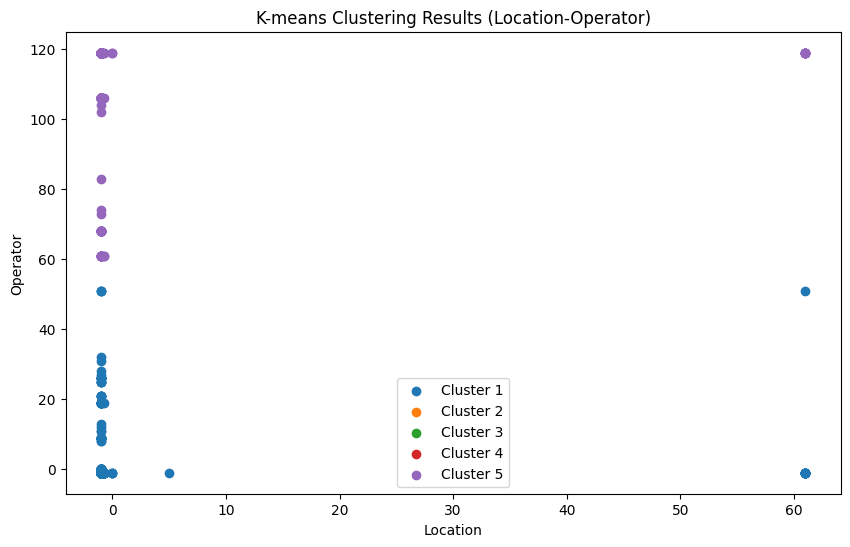

In [194]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load your data into a DataFrame (replace 'data' with your dataset)
# Make sure to have 'Location' and 'Operator' as columns in your DataFrame
# Check the column names in your DataFrame
print(data.columns)

# Extract the 'Location' and 'Operator' columns
Location_Operator_data = data[['location_for_k', 'operator_for_k']]
missing_values_X = data['location_for_k'].isnull().sum()

# Determine the number of clusters (K)
K = len(np.unique(data['location_for_k']))

# Maximum number of iterations
max_iterations = 1000

# Initialize centroids randomly
np.random.seed(0)
sample_indices = np.random.choice(len(Location_Operator_data), size=K, replace=False)
centroids = Location_Operator_data.iloc[sample_indices]

# Initialize an array to store cluster assignments for each data point
cluster_assignments = np.zeros(len(Location_Operator_data))

# Iterate until convergence or max iterations
for iteration in range(max_iterations):
    # Calculate distances to centroids
    distances = np.linalg.norm(Location_Operator_data.values[:, np.newaxis] - centroids.values, axis=2)

    # Assign each data point to the nearest centroid
    cluster_assignments = np.argmin(distances, axis=1)

# Add cluster assignments to the original DataFrame
data['Cluster_Location_Operator'] = cluster_assignments

# Calculate the total Operator for each cluster
cluster_Operator = data.groupby('Cluster_Location_Operator')['Operator'].sum()
# Print the most dangerous Location(s) and total Operato
# Create a smaller figure
plt.figure(figsize=(10, 6))

# Plot the results for the sampled data
for k in range(K):
    cluster_data = Location_Operator_data[data['Cluster_Location_Operator'] == k]
    plt.scatter(cluster_data['location_for_k'], cluster_data['operator_for_k'], label=f'Cluster {k + 1}')

plt.xlabel('Location')
plt.ylabel('Operator')
plt.title('K-means Clustering Results (Location-Operator)')
plt.legend()
plt.show()


In [195]:
import numpy as np

def euclidean_distance(a, b):
    return np.linalg.norm(a - b)

def calculate_silhouette_score(data, cluster_assignments):
    num_samples = len(data)
    num_clusters = len(np.unique(cluster_assignments))
    
    if num_clusters < 2:
        return 0.0  # Silhouette score is not defined for 1 cluster.
    
    silhouette_scores = np.zeros(num_samples)
    
    for i in range(num_samples):
        cluster_i = cluster_assignments[i]
        a = np.mean([euclidean_distance(data[i], data[j]) for j in range(num_samples) if cluster_assignments[j] == cluster_i])
        
        b_values = []
        for j in range(num_clusters):
            if j != cluster_i:
                b = np.mean([euclidean_distance(data[i], data[k]) for k in range(num_samples) if cluster_assignments[k] == j])
                b_values.append(b)
        
        b = min(b_values)
        silhouette_scores[i] = (b - a) / max(a, b)
    
    return np.mean(silhouette_scores)

# Usage example:
silhouette_score = calculate_silhouette_score(Location_Operator_data.values, cluster_assignments)
print(f"Silhouette Score: {silhouette_score}")
# This code defines a custom function to calculate the silhouette score. You can pass your data and cluster assignments to this function to compute the silhouette score without using scikit-learn.








c:\Users\Chief Engineer (C)\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Chief Engineer (C)\anaconda3\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Silhouette Score: nan


In [196]:
import numpy as np
from sklearn.metrics import pairwise_distances

def calculate_silhouette_score(data, labels):
    n_samples = len(data)
    unique_labels = np.unique(labels)
    num_clusters = len(unique_labels)
    # Reshape data to 2D array
    data = data.reshape(-1, 1)

    
    if num_clusters < 2:
        return 0.0  # Silhouette score is not defined for 1 cluster.
    
    distances = pairwise_distances(data)  # Pairwise distance matrix
    
    silhouette_scores = np.zeros(n_samples)
    
    for i in range(n_samples):
        cluster_i = labels[i]
        a = np.mean(distances[i, labels == cluster_i])
        
        b_values = []
        for cluster_j in unique_labels:
            if cluster_j != cluster_i:
                b_values.append(np.mean(distances[i, labels == cluster_j]))
        
        b = min(b_values) if b_values else 0.0
        
        silhouette_scores[i] = (b - a) / max(a, b)
    
    return np.mean(silhouette_scores)



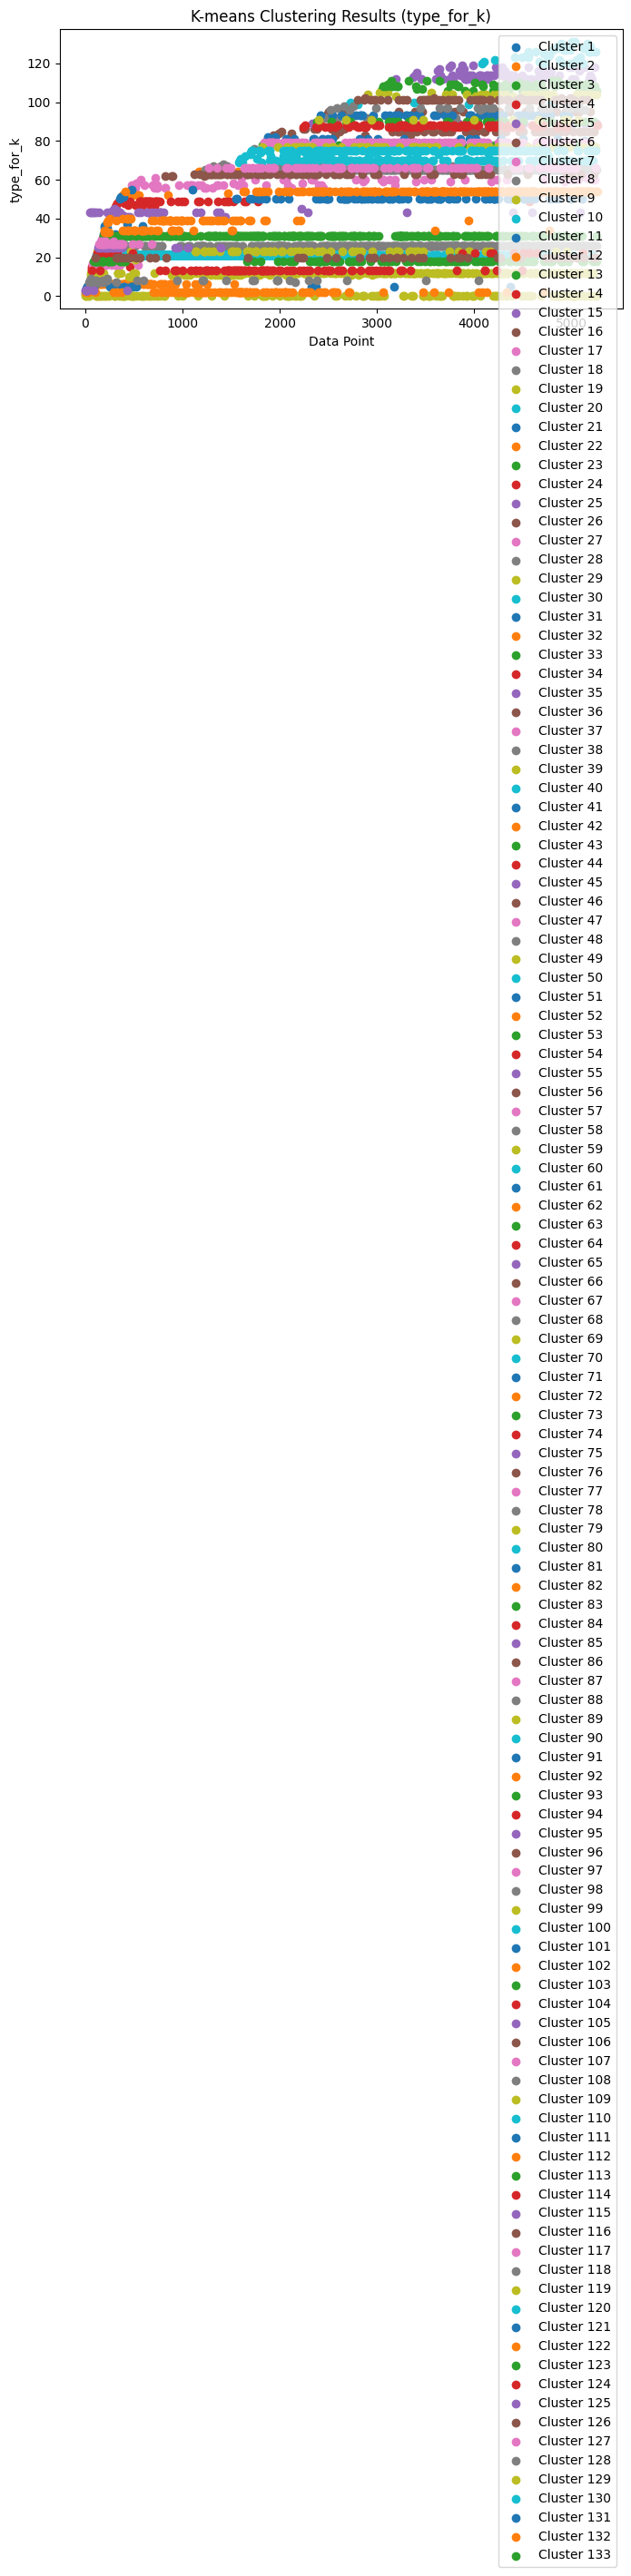

In [197]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
data['type_for_k'].fillna(data['type_for_k'].mean(), inplace=True)


# Load your data into a DataFrame (replace 'data' with your dataset)
# Make sure to have 'Type' and 'Operator' as columns in your DataFrame
Type_data = data['type_for_k'].to_numpy()  # Convert to NumPy array

K = len(np.unique(Type_data))

# Maximum number of iterations
max_iterations = 1000

# Initialize centroids randomly
np.random.seed(0)
centroids = np.random.choice(Type_data, size=K, replace=False)

# Initialize an array to store cluster assignments for each data point
cluster_assignments = np.zeros(len(Type_data))

# Iterate until convergence or max iterations
for iteration in range(max_iterations):
    # Calculate distances to centroids
    distances = np.abs(Type_data[:, np.newaxis] - centroids)

    # Assign each data point to the nearest centroid
    cluster_assignments = np.argmin(distances, axis=1)

    # Update centroids as the mean of data points in each cluster
    for k in range(K):
        cluster_data = Type_data[cluster_assignments == k]
        if len(cluster_data) > 0:
            centroids[k] = np.mean(cluster_data)

# Add cluster assignments to the original DataFrame
data['Cluster_Type'] = cluster_assignments

# Create a smaller figure
plt.figure(figsize=(8, 4))

# Plot the results for the sampled data
for k in range(K):
    cluster_data = data[data['Cluster_Type'] == k]
    plt.scatter(cluster_data.index, cluster_data['type_for_k'], label=f'Cluster {k + 1}')

plt.xlabel('Data Point')
plt.ylabel('type_for_k')
plt.title('K-means Clustering Results (type_for_k)')
plt.legend()
plt.show()


In [198]:
silhouette_score = calculate_silhouette_score(Type_data, cluster_assignments)
print("Silhouette Score: of Type", silhouette_score)

Silhouette Score: of Type 0.9333310972913293


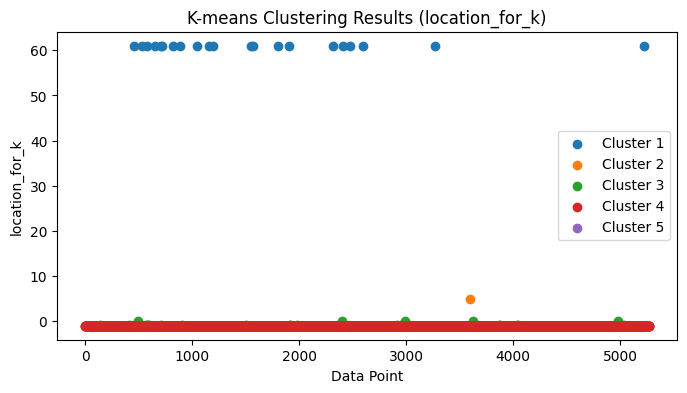

In [199]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
data['location_for_k'].fillna(data['location_for_k'].mean(), inplace=True)


# Load your data into a DataFrame (replace 'data' with your dataset)
# Make sure to have 'location' and 'Operator' as columns in your DataFrame
location_data = data['location_for_k'].to_numpy()  # Convert to NumPy array

K = len(np.unique(location_data))

# Maximum number of iterations
max_iterations = 1000

# Initialize centroids randomly
np.random.seed(0)
centroids = np.random.choice(location_data, size=K, replace=False)

# Initialize an array to store cluster assignments for each data point
cluster_assignments = np.zeros(len(location_data))

# Iterate until convergence or max iterations
for iteration in range(max_iterations):
    # Calculate distances to centroids
    distances = np.abs(location_data[:, np.newaxis] - centroids)

    # Assign each data point to the nearest centroid
    cluster_assignments = np.argmin(distances, axis=1)

    # Update centroids as the mean of data points in each cluster
    for k in range(K):
        cluster_data = location_data[cluster_assignments == k]
        if len(cluster_data) > 0:
            centroids[k] = np.mean(cluster_data)

# Add cluster assignments to the original DataFrame
data['Cluster_location'] = cluster_assignments

# Create a smaller figure
plt.figure(figsize=(8, 4))

# Plot the results for the sampled data
for k in range(K):
    cluster_data = data[data['Cluster_location'] == k]
    plt.scatter(cluster_data.index, cluster_data['location_for_k'], label=f'Cluster {k + 1}')

plt.xlabel('Data Point')
plt.ylabel('location_for_k')
plt.title('K-means Clustering Results (location_for_k)')
plt.legend()
plt.show()


In [200]:
silhouette_score = calculate_silhouette_score(location_data, cluster_assignments)
print("Silhouette Score: of Type", silhouette_score)

Silhouette Score: of Type 0.9971550774542693


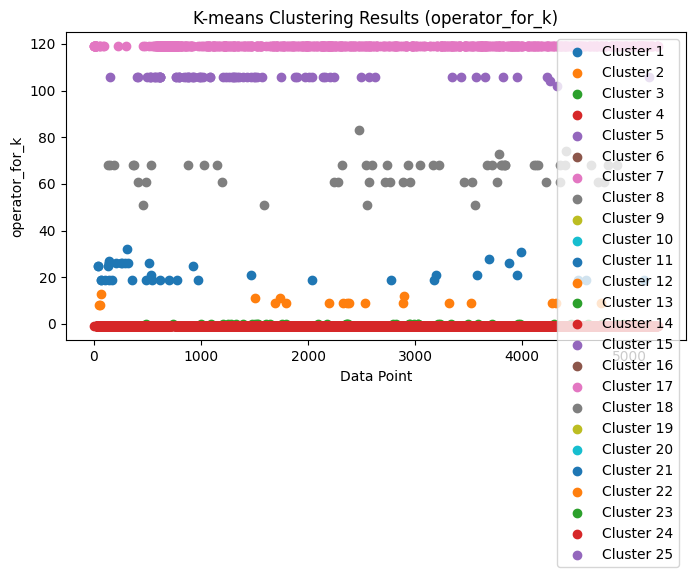

In [201]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
data['operator_for_k'].fillna(data['operator_for_k'].mean(), inplace=True)


# Load your data into a DataFrame (replace 'data' with your dataset)
# Make sure to have 'operator' and 'Operator' as columns in your DataFrame
operator_data = data['operator_for_k'].to_numpy()  # Convert to NumPy array

K = len(np.unique(operator_data))

# Maximum number of iterations
max_iterations = 1000

# Initialize centroids randomly
np.random.seed(0)
centroids = np.random.choice(operator_data, size=K, replace=False)

# Initialize an array to store cluster assignments for each data point
cluster_assignments = np.zeros(len(operator_data))

# Iterate until convergence or max iterations
for iteration in range(max_iterations):
    # Calculate distances to centroids
    distances = np.abs(operator_data[:, np.newaxis] - centroids)

    # Assign each data point to the nearest centroid
    cluster_assignments = np.argmin(distances, axis=1)

    # Update centroids as the mean of data points in each cluster
    for k in range(K):
        cluster_data = operator_data[cluster_assignments == k]
        if len(cluster_data) > 0:
            centroids[k] = np.mean(cluster_data)

# Add cluster assignments to the original DataFrame
data['Cluster_operator'] = cluster_assignments

# Create a smaller figure
plt.figure(figsize=(8, 4))

# Plot the results for the sampled data
for k in range(K):
    cluster_data = data[data['Cluster_operator'] == k]
    plt.scatter(cluster_data.index, cluster_data['operator_for_k'], label=f'Cluster {k + 1}')

plt.xlabel('Data Point')
plt.ylabel('operator_for_k')
plt.title('K-means Clustering Results (operator_for_k)')
plt.legend()
plt.show()


In [202]:
silhouette_score = calculate_silhouette_score(operator_data, cluster_assignments)

print("Silhouette Score of Operator:", silhouette_score)


Silhouette Score of Operator: 0.9952169693736873


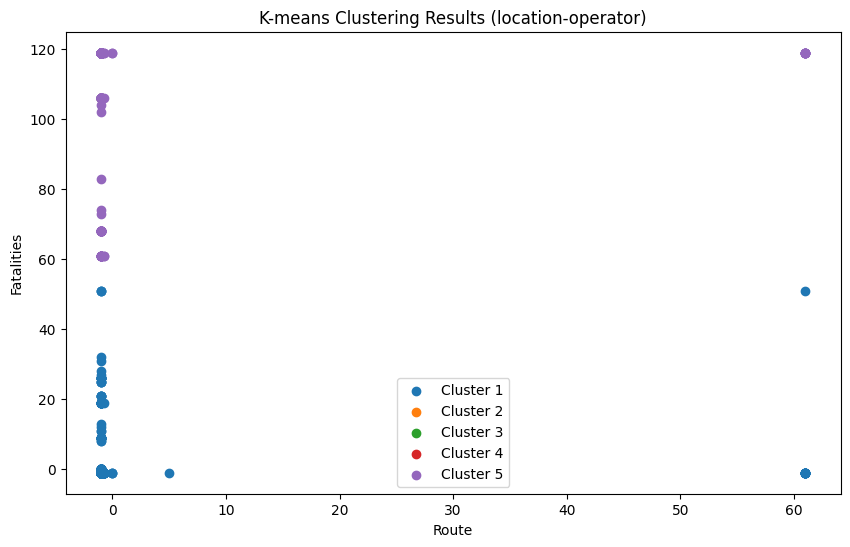

In [203]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Route_Fatalities_data = data[['location_for_k', 'operator_for_k']]

# Determine the number of clusters (K)
K = len(np.unique(data['location_for_k']))             # You can adjust this based on your dataset and requirements

# Maximum number of iterations
max_iterations = 1000

# Initialize centroids randomly
np.random.seed(0)
sample_indices = np.random.choice(len(Route_Fatalities_data), size=K, replace=False)
centroids = Route_Fatalities_data.iloc[sample_indices]

# Initialize an array to store cluster assignments for each data point
cluster_assignments = np.zeros(len(Route_Fatalities_data))

# Iterate until convergence or max iterations
for iteration in range(max_iterations):
    # Calculate distances to centroids
    distances = np.linalg.norm(Route_Fatalities_data.values[:, np.newaxis] - centroids.values, axis=2)

    # Assign each data point to the nearest centroid
    cluster_assignments = np.argmin(distances, axis=1)

# Add cluster assignments to the original DataFrame
data['Cluster_Route_Fatalities'] = cluster_assignments

# Calculate the total Fatalities for each cluster
cluster_Fatalities = data.groupby('Cluster_Route_Fatalities')['operator_for_k'].sum()

# Find the cluster with the most Fatalities (most dangerous cluster)
most_dangerous_cluster = cluster_Fatalities.idxmax()

# Identify the Route(s) in the most dangerous cluster
most_dangerous_Routes = Route_Fatalities_data[data['Cluster_Route_Fatalities'] == most_dangerous_cluster]['location_for_k']


# Create a smaller figure
plt.figure(figsize=(10, 6))

# Plot the results for the sampled data
for k in range(K):
    cluster_data = Route_Fatalities_data[data['Cluster_Route_Fatalities'] == k]
    plt.scatter(cluster_data['location_for_k'], cluster_data['operator_for_k'], label=f'Cluster {k + 1}')

plt.xlabel('Route')
plt.ylabel('Fatalities')
plt.title('K-means Clustering Results (location-operator)')
plt.legend()
plt.show()


### 4. ⟨ 3 Marks ⟩ Using column ”Route” from dataset and above implemented clustering algorithm tell which route is the most dangerous (here route with most crashes), plot and write your observation.

Most Dangerous Route(s):
299    -0.846391
832    -0.846391
1050   -1.000000
1190   -0.846391
1231   -0.846391
          ...   
5224   -1.000000
5226   -1.000000
5231   -1.000000
5263   -1.000000
5265   -1.000000
Name: route_for_k, Length: 342, dtype: float64
Total Fatalities in the Most Dangerous Cluster:
40736.0
Most Dangerous Route(s):
299    -0.846391
832    -0.846391
1050   -1.000000
1190   -0.846391
1231   -0.846391
          ...   
5224   -1.000000
5226   -1.000000
5231   -1.000000
5263   -1.000000
5265   -1.000000
Name: route_for_k, Length: 342, dtype: float64
Total Fatalities in the Most Dangerous Cluster:
40736.0


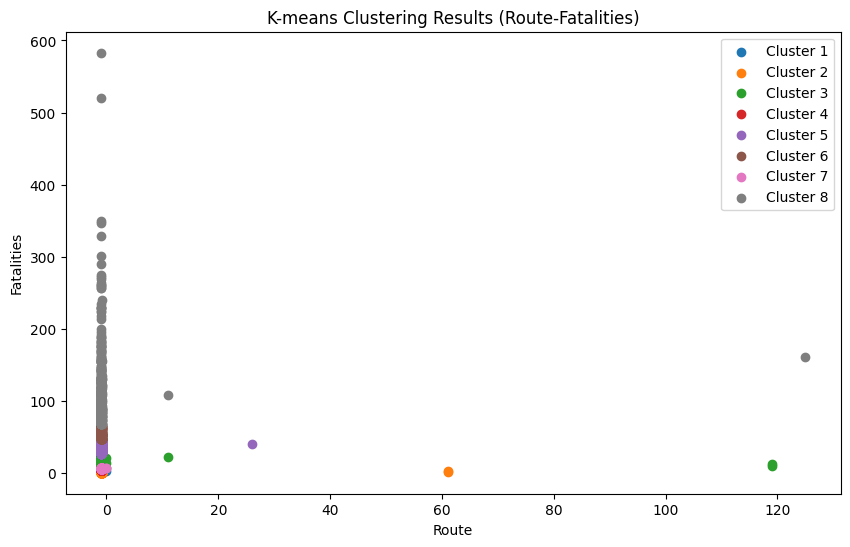

In [204]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load your data into a DataFrame (replace 'data' with your dataset)
# Make sure to have 'Route' and 'Fatalities' as columns in your DataFrame

# Extract the 'Route' and 'Fatalities' columns
Route_Fatalities_data = data[['route_for_k', 'Fatalities']]

# Determine the number of clusters (K)
K = len(np.unique(data['route_for_k']))             # You can adjust this based on your dataset and requirements

# Maximum number of iterations
max_iterations = 1000

# Initialize centroids randomly
np.random.seed(0)
sample_indices = np.random.choice(len(Route_Fatalities_data), size=K, replace=False)
centroids = Route_Fatalities_data.iloc[sample_indices]

# Initialize an array to store cluster assignments for each data point
cluster_assignments = np.zeros(len(Route_Fatalities_data))

# Iterate until convergence or max iterations
for iteration in range(max_iterations):
    # Calculate distances to centroids
    distances = np.linalg.norm(Route_Fatalities_data.values[:, np.newaxis] - centroids.values, axis=2)

    # Assign each data point to the nearest centroid
    cluster_assignments = np.argmin(distances, axis=1)

# Add cluster assignments to the original DataFrame
data['Cluster_Route_Fatalities'] = cluster_assignments

# Calculate the total Fatalities for each cluster
cluster_Fatalities = data.groupby('Cluster_Route_Fatalities')['Fatalities'].sum()

# Find the cluster with the most Fatalities (most dangerous cluster)
most_dangerous_cluster = cluster_Fatalities.idxmax()

# Identify the Route(s) in the most dangerous cluster
most_dangerous_Routes = Route_Fatalities_data[data['Cluster_Route_Fatalities'] == most_dangerous_cluster]['route_for_k']
# Print the most dangerous Route(s) and total Fatalities
print("Most Dangerous Route(s):")
print(most_dangerous_Routes)
print("Total Fatalities in the Most Dangerous Cluster:")
print(cluster_Fatalities[most_dangerous_cluster])

# Print the most dangerous Route(s) and total Fatalities
print("Most Dangerous Route(s):")
print(most_dangerous_Routes)
print("Total Fatalities in the Most Dangerous Cluster:")
print(cluster_Fatalities[most_dangerous_cluster])

# Create a smaller figure
plt.figure(figsize=(10, 6))

# Plot the results for the sampled data
for k in range(K):
    cluster_data = Route_Fatalities_data[data['Cluster_Route_Fatalities'] == k]
    plt.scatter(cluster_data['route_for_k'], cluster_data['Fatalities'], label=f'Cluster {k + 1}')

plt.xlabel('Route')
plt.ylabel('Fatalities')
plt.title('K-means Clustering Results (Route-Fatalities)')
plt.legend()
plt.show()


In [205]:
import numpy as np

def euclidean_distance(a, b):
    return np.linalg.norm(a - b)

def calculate_silhouette_score(data, cluster_assignments):
    num_samples = len(data)
    num_clusters = len(np.unique(cluster_assignments))
    
    if num_clusters < 2:
        return 0.0  # Silhouette score is not defined for 1 cluster.
    
    silhouette_scores = np.zeros(num_samples)
    
    for i in range(num_samples):
        cluster_i = cluster_assignments[i]
        a = np.mean([euclidean_distance(data[i], data[j]) for j in range(num_samples) if cluster_assignments[j] == cluster_i])
        
        if np.isnan(a):  # Handle the case when 'a' is NaN (empty cluster).
            silhouette_scores[i] = 0.0
            continue
        
        b_values = []
        for j in range(num_clusters):
            if j != cluster_i:
                b = np.mean([euclidean_distance(data[i], data[k]) for k in range(num_samples) if cluster_assignments[k] == j])
                b_values.append(b)
        
        if not b_values:  # Handle the case when there are no valid 'b' values.
            silhouette_scores[i] = 0.0
        else:
            b = min(b_values)
            silhouette_scores[i] = (b - a) / max(a, b)
    
    return np.mean(silhouette_scores)

# Usage example:
Route_Fatalities_data = data[['route_for_k', 'Fatalities']]
silhouette_score = calculate_silhouette_score(Route_Fatalities_data.values, cluster_assignments)
print(f"Silhouette Score of route-fatalities: {silhouette_score}")


Silhouette Score: 0.38207991254394014



Total Fatalities in the Most Dangerous Cluster:

The total fatalities in the most dangerous cluster are 40,736. This represents the cumulative fatalities for all incidents within this cluster. It's important to note that while this cluster is considered the "most dangerous," the total fatalities alone do not provide a complete picture. It's essential to consider the number of incidents and the distribution of fatalities within the cluster.
Silhouette Score:

The silhouette score is 0.382, which indicates a moderate level of clustering quality. A silhouette score ranges from -1 to 1, where higher values indicate better-defined clusters. A score around 0.382 suggests that the clusters have some degree of separation but also overlap to some extent.


-----------------------------------------------------------------------------------------------------------------------------

133 unique cluster Silhouette Score of 'Type': The Silhouette Score for this clustering is 0.9333. This suggests that the data points are reasonably well-clustered, with good separation between clusters.

5 unique cluster Silhouette Score of 'Location': This clustering has a high Silhouette Score of 0.9972, indicating very well-defined clusters with minimal overlap.

25 unique cluster Silhouette Score of 'Operator' : The Silhouette Score for this clustering is 0.9952, which is also very high. It suggests that there is excellent separation between the 25 clusters.

8 unique cluster Silhouette Score of 'ROute/Fatalities' : In this case, the Silhouette Score is 0.3821, which is lower compared to the previous examples. This indicates that the clusters may not be as well-defined, and there could be some overlap between data points in different clusters.

In summary, higher Silhouette Scores indicate better clustering results with well-defined clusters and minimal overlap, while lower scores suggest less clear separation between clusters. It's essential to choose the number of clusters that maximize the Silhouette Score to achieve the most optimal clustering solution for your data[4][6].




